In [1]:
from lab1 import jobs, job_detail, com_detail
from pylab import mpl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts
plt.style.use('ggplot')
%matplotlib inline

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  # 把plt默认的图片size调大一点

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\programming\compiler\Anaconda3\envs\datasci\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
data_job = pd.DataFrame(list(job_detail.find()))
del data_job['_id']

In [3]:
data_job.loc[222]

address                                                中国卫星通信大厦
attraction                       免费三餐，租房补贴，休闲下午茶，过亿用户，职业大牛，晋升空间
chance                                                       面议
city                                                         北京
cname                                                      字节跳动
collected                                                     0
cuuid                                          com_tyju1cjdpntm
day                                                           5
degree                                                       本科
delivered                                                     0
endtime                                              2019-01-23
ftype                                                         1
iname                                        今日头条/抖音&火山大数据开发实习生
industry                                                  移动互联网
info          <p>【今日头条】诚招大数据开发实习生&nbsp;<span></span> </p><p>...
invited                                 

In [4]:
data_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 27 columns):
address       449 non-null object
attraction    449 non-null object
chance        449 non-null object
city          449 non-null object
cname         449 non-null object
collected     449 non-null object
cuuid         449 non-null object
day           449 non-null int64
degree        449 non-null object
delivered     449 non-null object
endtime       449 non-null object
ftype         449 non-null object
iname         449 non-null object
industry      449 non-null object
info          449 non-null object
invited       449 non-null object
is_hr         449 non-null bool
logo          449 non-null object
maxsal        449 non-null object
mina_url      449 non-null object
minsal        449 non-null object
month         449 non-null int64
overdue       449 non-null object
refresh       449 non-null object
reslan        449 non-null object
scale         449 non-null object
url           4

In [5]:
data_clean = data_job.drop(['collected', 'cuuid', 'delivered', 'ftype', 
                             'invited', 'is_hr', 'logo', 'mina_url', 'url'], axis = 1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 18 columns):
address       449 non-null object
attraction    449 non-null object
chance        449 non-null object
city          449 non-null object
cname         449 non-null object
day           449 non-null int64
degree        449 non-null object
endtime       449 non-null object
iname         449 non-null object
industry      449 non-null object
info          449 non-null object
maxsal        449 non-null object
minsal        449 non-null object
month         449 non-null int64
overdue       449 non-null object
refresh       449 non-null object
reslan        449 non-null object
scale         449 non-null object
dtypes: int64(2), object(16)
memory usage: 63.2+ KB


In [6]:
data_clean[data_clean['maxsal'] == '0'].sample(5)

,address,attraction,chance,city,cname,day,degree,endtime,iname,industry,info,maxsal,minsal,month,overdue,refresh,reslan,scale
44,中国卫星通信大厦,免费三餐，租房补贴，休闲下午茶，过亿用户，职业大牛，晋升空间,面议,北京,字节跳动,4,不限,2019-01-08,今日头条(抖音&火山)大数据开发实习生,移动互联网,<p>【今日头条】诚招大数据开发实习生&nbsp;<span></span> </p><p>...,0,0,4,0,2018-12-29 10:44:47,中文,2000人以上
200,上海市徐汇区枫林路485号6号楼,认真、负责、绩效好的优秀实习生有留任转正机会,可转正,上海,Kantar Media CIC,4,本科,2018-12-30,大数据处理实习生ETL Intern,市场调研,<p><span>工作职责：</span><span></span> </p><p><spa...,0,0,4,0,2018-12-24 11:32:11,中文,150-500人
360,网易北京研发中心,网易新闻,面议,北京,网易,5,不限,2019-04-11,大数据平台后端开发实习生,互联网,大数据平台后端开发实习生 1名<br> 工作内容<br> 1、 负责海量大数据平台的后端软件...,0,0,7,0,2018-11-26 12:58:41,中文,2000人以上
310,上海市徐汇区,大数据公司 专业平台 发展前景,面议,上海,wisers,3,本科,2019-01-29,媒体管理部实习生,计算机/互联网,<strong>该职位接受寒假实习。</strong><br><br><p>工作内容：<sp...,0,0,13,0,2018-12-12 10:51:13,中文,500-2000人
260,中航广场头条矮楼,薪酬400/天，有房补，免费三餐和下午茶。,可转正,北京,字节跳动,5,不限,2019-08-31,后端开发实习生-数据平台,移动互联网,<div>职位描述：职位描述\r\n1、负责数据平台产品的功能迭代、性能优化；\r\n2、参...,0,0,5,0,2018-12-19 18:21:15,中文,2000人以上


In [7]:
data_clean.scale.unique()

array(['150-500人', '500-2000人', '50-150人', '少于15人', '2000人以上', '15-50人',
       ''], dtype=object)

In [8]:
data_clean.loc[data_job['scale'] == '少于15人', 'scale'] = '小型企业'
data_clean.loc[data_job['scale'] == '15-50人', 'scale'] = '小型企业'
data_clean.loc[data_job['scale'] == '50-150人', 'scale'] = '小型企业'
data_clean.loc[data_job['scale'] == '150-500人', 'scale'] = '中型企业'
data_clean.loc[data_job['scale'] == '500-2000人', 'scale'] = '中型企业'
data_clean.loc[data_job['scale'] == '2000人以上', 'scale'] = '大型企业'
data_clean.loc[data_job['scale'] == '5000人以上', 'scale'] = '大型企业'
data_clean.loc[data_job['scale'].isna(), 'scale'] = np.nan

In [9]:
data_clean.city.unique()

array(['广州', '北京', '宁波', '南京', '武汉', '杭州', '上海', '成都', '长沙', '北京,上海,昆山',
       '深圳', '沈阳', '哈尔滨', '西安', '厦门', '福州', '大连', '苏州', '重庆', '郑州', '珠海',
       '天津', '北京,郑州,济南', '合肥', '无锡', '全国', '北京,成都', '上海,合肥,杭州', '南宁',
       '东莞', '攀枝花', '甘孜', '石家庄', '北京,上海,广州', ',杭州,北京', '青岛', '北京,武汉,成都',
       '长春', '北京,青岛', '济南', '昆山', '佛山', '北京,天津,太原,昆明,呼和浩特', '苏州,无锡,武汉',
       '海口', ',上海', '北京,上海'], dtype=object)

In [10]:
data_clean.loc[data_clean['city'] == '北京,上海,昆山', 'city'] = '北京'
data_clean.loc[data_clean['city'] == '北京,郑州,济南', 'city'] = '北京'
data_clean.loc[data_clean['city'] == '北京,成都', 'city'] = '北京'
data_clean.loc[data_clean['city'] == '上海,合肥,杭州', 'city'] = '上海'
data_clean.loc[data_clean['city'] == '北京,上海,广州', 'city'] = '北京'
data_clean.loc[data_clean['city'] == ',杭州,北京', 'city'] = '杭州'
data_clean.loc[data_clean['city'] == '北京,青岛', 'city'] = '北京'
data_clean.loc[data_clean['city'] == '北京,武汉,成都', 'city'] = '北京'
data_clean.loc[data_clean['city'] == '北京,天津,太原,昆明,呼和浩特', 'city'] = '北京'
data_clean.loc[data_clean['city'] == '苏州,无锡,武汉', 'city'] = '苏州'
data_clean.loc[data_clean['city'] == '北京,上海', 'city'] = '北京'
data_clean.loc[data_clean['city'] == ',上海', 'city'] = '上海'

In [11]:
data_clean.city.unique()

array(['广州', '北京', '宁波', '南京', '武汉', '杭州', '上海', '成都', '长沙', '深圳', '沈阳',
       '哈尔滨', '西安', '厦门', '福州', '大连', '苏州', '重庆', '郑州', '珠海', '天津', '合肥',
       '无锡', '全国', '南宁', '东莞', '攀枝花', '甘孜', '石家庄', '青岛', '长春', '济南', '昆山',
       '佛山', '海口'], dtype=object)

In [12]:
data_clean['maxsal'] = pd.to_numeric(data_clean['maxsal'])
data_clean['minsal'] = pd.to_numeric(data_clean['minsal'])

In [13]:
city = data_clean['city'].value_counts()
city[:15]

北京    179
上海    100
广州     25
南京     24
深圳     23
成都     21
杭州     19
武汉      6
福州      5
大连      4
西安      3
全国      3
合肥      3
宁波      3
苏州      3
Name: city, dtype: int64

In [14]:
bar = pyecharts.Bar('城市与职位数量')
bar.add('', city[:15].index, city[:15].values, mark_point=["max"])
bar

In [15]:
def topN(dataframe, n=5):
    counts = dataframe.value_counts()
    return counts[:n]
data_clean.groupby('city').cname.apply(topN).loc[list(city[:15].index)]

city         
上海    驰大数据       8
      万国数据       4
      星环科技       4
      朝阳永续       3
      长江众创       3
全国    凯捷咨询       2
      新东方在线      1
北京    中科院计算所     7
      字节跳动       7
      智擎工业大数据    5
      小米         4
      中国电信北研院    4
南京    朗坤智慧       8
      雷森科技       4
      浦和数据       1
      小视科技       1
      亚信         1
合肥    梦创大数据      2
      中科类脑       1
大连    拓云科技       1
      窝创网络       1
      悦视光合       1
      文思海辉       1
宁波    萌牙         3
广州    原力大数据      3
      点动信息       2
      紫光云        2
      火烈鸟网络      2
      光大教育       1
成都    汇众天智       3
      优炫软件       2
      极米科技       2
      婷宝实业       2
      开方数据       1
杭州    袋鼠云        2
      华信设计       2
      阿里健康       2
      云集         2
      同花顺        2
武汉    东软集团       2
      小米移动       1
      小米         1
      亚信软件       1
      中新淼大数据     1
深圳    腾讯         2
      百度         2
      中安信业       2
      中策大数据      2
      歧黄咨询       1
福州    南威软件       2
      宝宝巴士       1
      联迪商用       

In [16]:
data_clean['minsal_month'] = data_clean['minsal'] * data_clean['day'] * 4
data_clean['minsal_month'].mean()

2581.80846325167

In [17]:
data_clean['maxsal_month'] = data_clean['maxsal'] * data_clean['day'] * 4
data_clean['maxsal_month'].mean()

3568.890868596882

In [18]:
minsalary_by_city = data_clean.groupby('city')['minsal_month'].mean()
minsalary_by_city.nlargest(10)

city
哈尔滨    7000.000000
沈阳     7000.000000
武汉     5066.666667
西安     3400.000000
合肥     3333.333333
厦门     3000.000000
宁波     3000.000000
济南     3000.000000
海口     3000.000000
深圳     2910.434783
Name: minsal_month, dtype: float64

In [19]:
maxsalary_by_city = data_clean.groupby('city')['maxsal_month'].mean()
maxsalary_by_city.nlargest(10)

city
哈尔滨    8400.000000
沈阳     8400.000000
武汉     7600.000000
合肥     4666.666667
西安     4333.333333
福州     4040.000000
宁波     4000.000000
济南     4000.000000
海口     4000.000000
深圳     3916.869565
Name: maxsal_month, dtype: float64

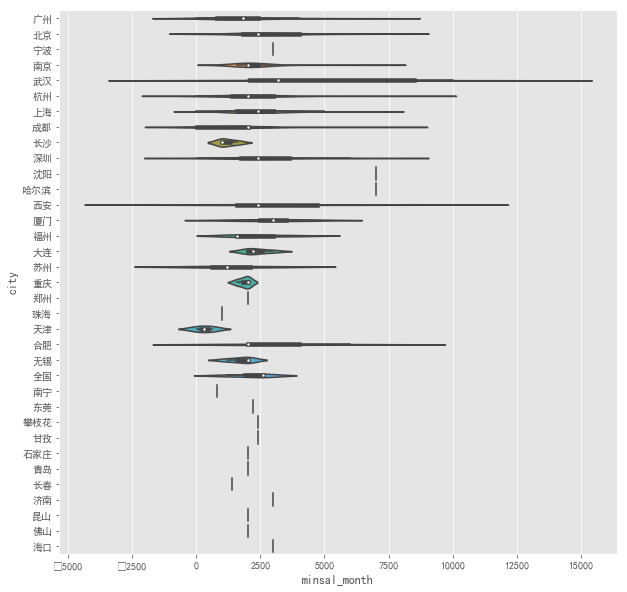

In [24]:
sns.violinplot(x ='minsal_month', y ='city', data = data_clean)

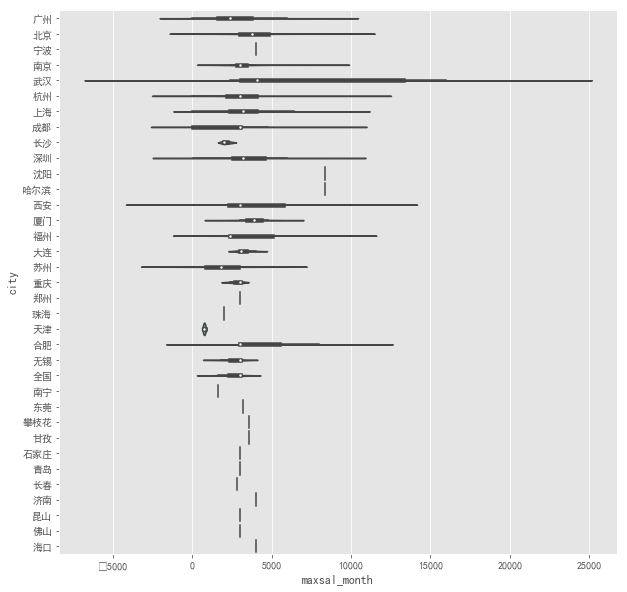

In [25]:
sns.violinplot(x ='maxsal_month', y ='city', data = data_clean)

In [20]:
job_degree = data_clean['degree'].value_counts()
job_degree

本科    264
不限    100
硕士     56
大专     28
博士      1
Name: degree, dtype: int64

In [21]:
data_clean.groupby('degree')['minsal_month'].mean().sort_values()

degree
大专    1971.428571
不限    2522.880000
本科    2642.090909
硕士    2647.000000
博士    6000.000000
Name: minsal_month, dtype: float64

In [22]:
data_clean.groupby('degree')['maxsal_month'].mean().sort_values()

degree
大专    2837.142857
不限    3372.600000
本科    3655.378788
硕士    3798.428571
博士    8000.000000
Name: maxsal_month, dtype: float64

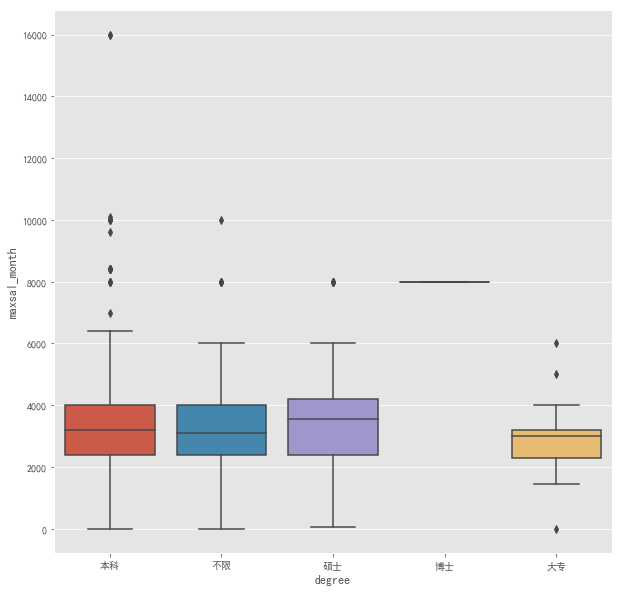

In [23]:
sns.boxplot(x="degree", y="maxsal_month", data=data_clean)